In [6]:
from qiskit.circuit.library import TwoLocal, PauliTwoDesign

ansatz = TwoLocal(4, 'ry', 'cx', reps=1)
print(ansatz.decompose())

     ┌──────────┐                    ┌──────────┐                        
q_0: ┤ Ry(θ[0]) ├──■────■─────────■──┤ Ry(θ[4]) ├────────────────────────
     ├──────────┤┌─┴─┐  │         │  └──────────┘┌──────────┐            
q_1: ┤ Ry(θ[1]) ├┤ X ├──┼────■────┼───────■──────┤ Ry(θ[5]) ├────────────
     ├──────────┤└───┘┌─┴─┐┌─┴─┐  │       │      └──────────┘┌──────────┐
q_2: ┤ Ry(θ[2]) ├─────┤ X ├┤ X ├──┼───────┼───────────■──────┤ Ry(θ[6]) ├
     ├──────────┤     └───┘└───┘┌─┴─┐   ┌─┴─┐       ┌─┴─┐    ├──────────┤
q_3: ┤ Ry(θ[3]) ├───────────────┤ X ├───┤ X ├───────┤ X ├────┤ Ry(θ[7]) ├
     └──────────┘               └───┘   └───┘       └───┘    └──────────┘


In [9]:
ansatz = PauliTwoDesign(4, reps=2)
print(ansatz.decompose())

     ┌─────────┐┌──────────┐   ┌──────────┐                ┌──────────┐»
q_0: ┤ Ry(π/4) ├┤ Rx(θ[0]) ├─■─┤ Rz(θ[4]) ├─────────────■──┤ Ry(θ[8]) ├»
     ├─────────┤├──────────┤ │ └──────────┘┌──────────┐ │  └──────────┘»
q_1: ┤ Ry(π/4) ├┤ Rz(θ[1]) ├─■──────■──────┤ Rx(θ[5]) ├─■───────■──────»
     ├─────────┤├──────────┤        │      ├──────────┤         │      »
q_2: ┤ Ry(π/4) ├┤ Rz(θ[2]) ├─■──────■──────┤ Rz(θ[6]) ├─■───────■──────»
     ├─────────┤├──────────┤ │ ┌──────────┐└──────────┘ │ ┌───────────┐»
q_3: ┤ Ry(π/4) ├┤ Ry(θ[3]) ├─■─┤ Ry(θ[7]) ├─────────────■─┤ Rz(θ[11]) ├»
     └─────────┘└──────────┘   └──────────┘               └───────────┘»
«                  
«q_0: ─────────────
«      ┌──────────┐
«q_1: ─┤ Ry(θ[9]) ├
«     ┌┴──────────┤
«q_2: ┤ Rz(θ[10]) ├
«     └───────────┘
«q_3: ─────────────
«                  


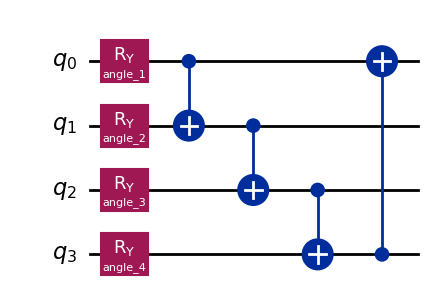

In [20]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
 
qc = QuantumCircuit(4)
qc.qubits

angle1 = Parameter('angle_1')
angle2 = Parameter('angle_2')
angle3 = Parameter('angle_3')
angle4 = Parameter('angle_4')

qc.ry(angle1, 0)
qc.ry(angle2, 1)
qc.ry(angle3, 2)
qc.ry(angle4, 3)

qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)
qc.cx(3,0)

qc.draw('mpl')

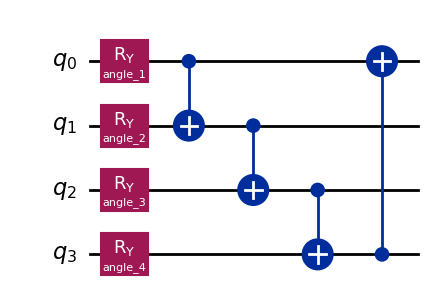

In [24]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
 
ansatz = QuantumCircuit(4)
ansatz.qubits

angle1 = Parameter('angle_1')
angle2 = Parameter('angle_2')
angle3 = Parameter('angle_3')
angle4 = Parameter('angle_4')

ansatz.ry(angle1, 0)
ansatz.ry(angle2, 1)
ansatz.ry(angle3, 2)
ansatz.ry(angle4, 3)

ansatz.cx(0,1)
ansatz.cx(1,2)
ansatz.cx(2,3)
ansatz.cx(3,0)

ansatz.draw('mpl')

In [23]:
qc

In [22]:
ansatz

In [36]:
entangler_map = [[0, 1], [1, 2], [2,3], [3,0]]  # entangle the first and last two-way
two = TwoLocal(4, 'ry', 'cry', entangler_map, reps=1, skip_final_rotation_layer=True)
circuit = two 
print(circuit.decompose().draw())  # note, that the parameters are the same!

     ┌──────────┐                                    ┌──────────┐
q_0: ┤ Ry(θ[0]) ├─────■──────────────────────────────┤ Ry(θ[7]) ├
     ├──────────┤┌────┴─────┐                        └────┬─────┘
q_1: ┤ Ry(θ[1]) ├┤ Ry(θ[4]) ├─────■───────────────────────┼──────
     ├──────────┤└──────────┘┌────┴─────┐                 │      
q_2: ┤ Ry(θ[2]) ├────────────┤ Ry(θ[5]) ├─────■───────────┼──────
     ├──────────┤            └──────────┘┌────┴─────┐     │      
q_3: ┤ Ry(θ[3]) ├────────────────────────┤ Ry(θ[6]) ├─────■──────
     └──────────┘                        └──────────┘            
